# Data Understanding

## Download dataset

In [2]:
# https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset
%pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)

X.head()

Note: you may need to restart the kernel to use updated packages.
{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 'Hadi Fan

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


## Data preparation

In [3]:
import pandas as pd

df = X.copy()
y_preproc = y.values.reshape(-1)

columns_for_coding = ['season', 'holiday', 'workingday', 'weathersit']
categorical_data = df[columns_for_coding].astype(str)
one_hot_encoded = pd.get_dummies(categorical_data)
# one_hot_encoded

X_preproc = pd.concat([df, one_hot_encoded], axis=1)
# X_preproc

columns_for_deleting = ['dteday', 'yr', 'season', 'holiday', 'workingday', 'weathersit']
X_preproc = X_preproc.drop(columns=columns_for_deleting)

X_preproc

,mnth,hr,weekday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,6,0.24,0.2879,0.81,0.0000,True,False,False,False,True,False,True,False,True,False,False,False
1,1,1,6,0.22,0.2727,0.80,0.0000,True,False,False,False,True,False,True,False,True,False,False,False
2,1,2,6,0.22,0.2727,0.80,0.0000,True,False,False,False,True,False,True,False,True,False,False,False
3,1,3,6,0.24,0.2879,0.75,0.0000,True,False,False,False,True,False,True,False,True,False,False,False
4,1,4,6,0.24,0.2879,0.75,0.0000,True,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12,19,1,0.26,0.2576,0.60,0.1642,True,False,False,False,True,False,False,True,False,True,False,False
17375,12,20,1,0.26,0.2576,0.60,0.1642,True,False,False,False,True,False,False,True,False,True,False,False
17376,12,21,1,0.26,0.2576,0.60,0.1642,True,False,False,False,True,False,False,True,True,False,False,False
17377,12,22,1,0.26,0.2727,0.56,0.1343,True,False,False,False,True,False,False,True,True,False,False,False


In [4]:
X_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mnth          17379 non-null  int64  
 1   hr            17379 non-null  int64  
 2   weekday       17379 non-null  int64  
 3   temp          17379 non-null  float64
 4   atemp         17379 non-null  float64
 5   hum           17379 non-null  float64
 6   windspeed     17379 non-null  float64
 7   season_1      17379 non-null  bool   
 8   season_2      17379 non-null  bool   
 9   season_3      17379 non-null  bool   
 10  season_4      17379 non-null  bool   
 11  holiday_0     17379 non-null  bool   
 12  holiday_1     17379 non-null  bool   
 13  workingday_0  17379 non-null  bool   
 14  workingday_1  17379 non-null  bool   
 15  weathersit_1  17379 non-null  bool   
 16  weathersit_2  17379 non-null  bool   
 17  weathersit_3  17379 non-null  bool   
 18  weathersit_4  17379 non-nu

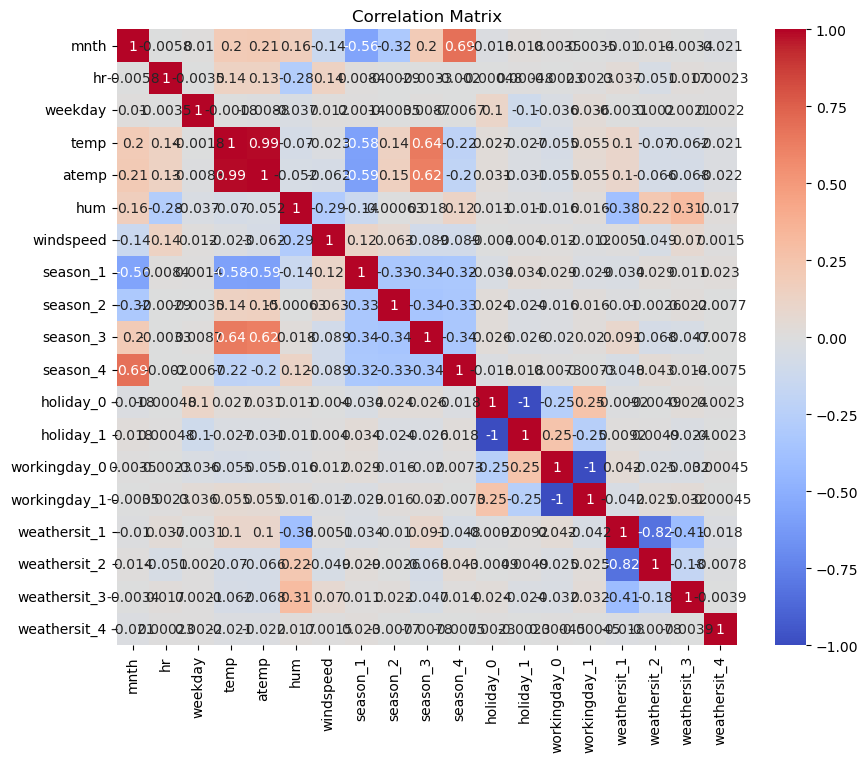

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix for X_preproc
correlation_matrix = X_preproc.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

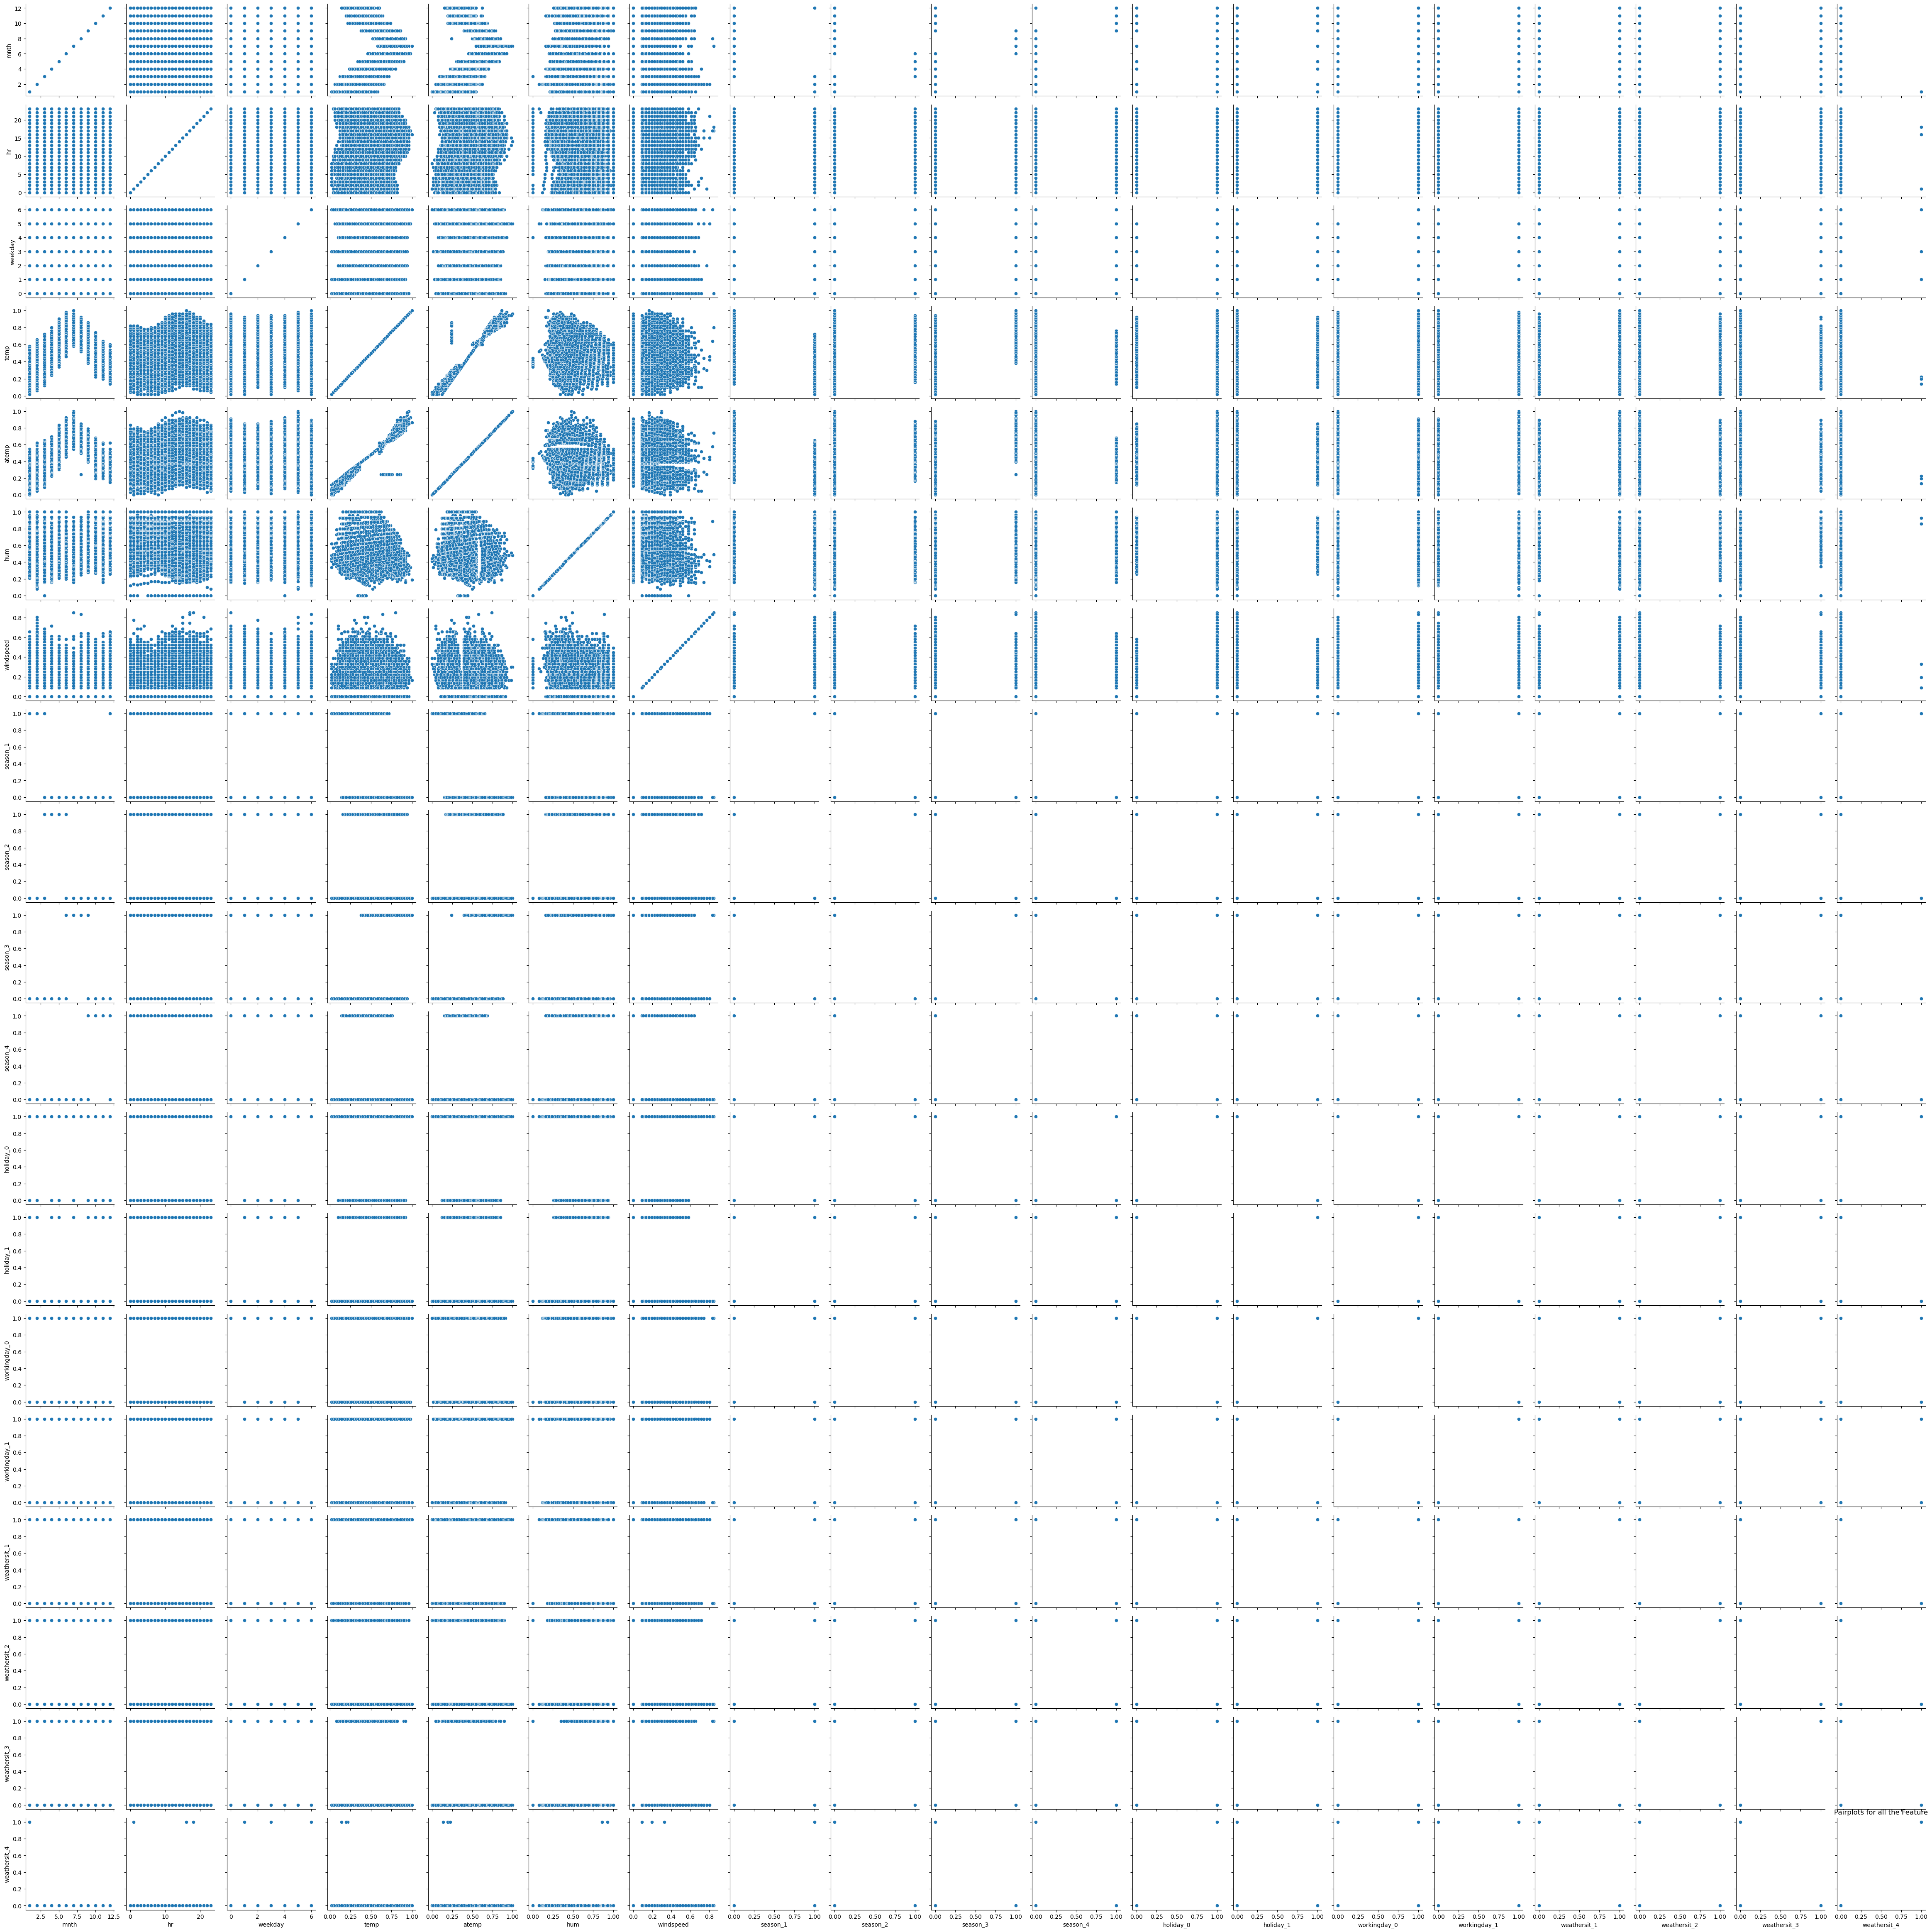

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.PairGrid(X_preproc)
plt.title('Pairplots for all the Feature')
g.map(sns.scatterplot)
plt.show()

## Feature selection

In [8]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the MLPRegressor model
selector = MLPRegressor(random_state=1, max_iter=500)

# Fit the model on the preprocessed features and target variable
selector.fit(X_preproc, y_preproc)

MLPRegressor(max_iter=500, random_state=1)

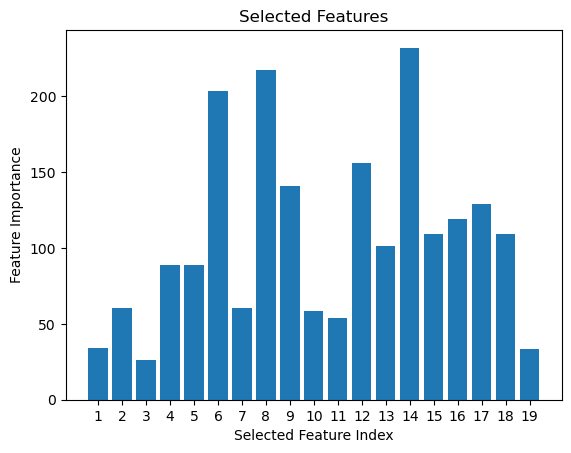

In [9]:
# Get the feature importance scores
feature_importances = np.abs(selector.coefs_[0]).sum(axis=1)

# Get the indices of the selected features
selected_features = np.where(feature_importances != 0)[0]

# Plot the selected features
plt.figure()
plt.bar(range(len(selected_features)), feature_importances[selected_features])
plt.xticks(range(len(selected_features+1)), selected_features+1)
plt.xlabel("Selected Feature Index")
plt.ylabel("Feature Importance")
plt.title("Selected Features")
plt.show()

In [28]:
print("The minimum loss reached : %d" % selector.best_loss_)

The minimum loss reached : 4742


In [21]:
# Print input features and their selection status
for i, feature in enumerate(X_preproc.columns):
    selected = feature in X_preproc.columns[selected_features]
    print(f"Selected: {selected} \t Feature {i+1}: {feature}")

print("\n")
# Print relative ranking of importance
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: Importance = {importance:.6}")


Selected: True 	 Feature 1: mnth
Selected: True 	 Feature 2: hr
Selected: True 	 Feature 3: weekday
Selected: True 	 Feature 4: temp
Selected: True 	 Feature 5: atemp
Selected: True 	 Feature 6: hum
Selected: True 	 Feature 7: windspeed
Selected: True 	 Feature 8: season_1
Selected: True 	 Feature 9: season_2
Selected: True 	 Feature 10: season_3
Selected: True 	 Feature 11: season_4
Selected: True 	 Feature 12: holiday_0
Selected: True 	 Feature 13: holiday_1
Selected: True 	 Feature 14: workingday_0
Selected: True 	 Feature 15: workingday_1
Selected: True 	 Feature 16: weathersit_1
Selected: True 	 Feature 17: weathersit_2
Selected: True 	 Feature 18: weathersit_3
Selected: True 	 Feature 19: weathersit_4


Feature 1: Importance = 34.1295
Feature 2: Importance = 60.261
Feature 3: Importance = 26.2604
Feature 4: Importance = 89.0506
Feature 5: Importance = 88.7477
Feature 6: Importance = 203.065
Feature 7: Importance = 60.1758
Feature 8: Importance = 217.335
Feature 9: Importance = 14

# Interpretability using interpretable model (for Numeric Dataset)

## Interpretability using a linear/logistic regression